In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([4132., 4684., 4177., 4351., 4072., 3795., 4137., 4401., 4063.,
        4188.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

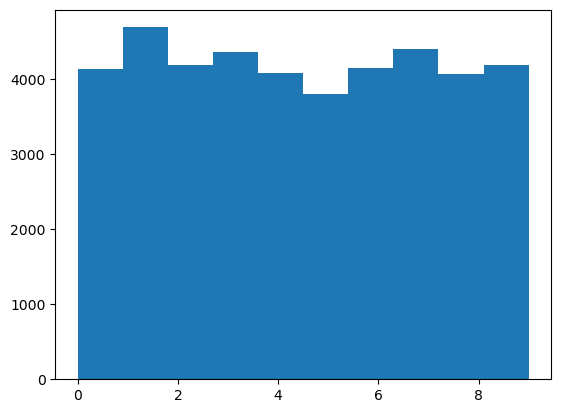

In [40]:
plt.hist(df_train.label)

In [4]:
df_train.shape

(42000, 785)

In [5]:
# Check for NaN in dataframe
df_train.isnull().values.any() 

False

In [6]:
X = df_train.drop(columns=["label"], axis=1)
y = df_train['label']

In [7]:
assert X.shape == (42000, 784)
assert y.shape == (42000,)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
"X_train: {}; X_valid: {}".format(X_train.shape, X_valid.shape)

'X_train: (29400, 784); X_valid: (12600, 784)'

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

knn_clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)


knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [16]:
y_train_pred = knn_clf.predict(X_train)

In [17]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy = accuracy_score(y_train, y_train_pred)
accuracy

0.9764625850340136

In [20]:
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression(random_state=42, n_jobs=-1)

In [21]:
logreg_clf.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=-1, random_state=42)

In [22]:
y_train_pred = logreg_clf.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_train

0.942108843537415

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [69]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42, probability=True)
svm_clf.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [42]:
y_train_pred = svm_clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_train

0.9879251700680272

In [24]:
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_train

1.0

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [50]:
y_train_pred = gb_clf.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_train

0.9708843537414966

In [73]:
def evaluate_models(models, X_valid, y_valid):
    evaluation_scores = []
    
    for model_name, model in models.items():
        y_pred = model.predict(X_valid)
        evaluation_scores.append((model, "{} validation score: {}".format(model_name, accuracy_score(y_valid, y_pred))))
        
    return evaluation_scores

In [71]:
models = {
    "KNN": knn_clf,
    "Logreg": logreg_clf,
    "Random Forest": rf_clf,
    "SVM": svm_clf,
    #"Gradient Bossting": gb_clf
}

In [53]:
scores = evaluate_models(models, X_valid, y_valid)
scores

KNN validation score: 0.9655555555555555
Logreg validation score: 0.915
Random Forest validation score: 0.9613492063492064
SVM validation score: 0.974047619047619
Gradient Bossting validation score: 0.9403968253968253


In [72]:
from sklearn.ensemble import VotingClassifier

# All models except Gradient Boosting due to its long training time
soft_vote = VotingClassifier(estimators = list(models.items()), voting='soft')
hard_vote = VotingClassifier(estimators = list(models.items()), voting='hard')

votings = {
    "soft": soft_vote,
    "hard": hard_vote
}

for ensemble in votings.values():
    ensemble.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_ma

In [74]:
scores = evaluate_models(votings, X_valid, y_valid)
scores

[8 1 9 ... 5 5 0]
[8 1 9 ... 5 5 0]


[(VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_jobs=-1)),
                               ('Logreg',
                                LogisticRegression(n_jobs=-1, random_state=42)),
                               ('Random Forest',
                                RandomForestClassifier(n_jobs=-1,
                                                       random_state=42)),
                               ('SVM', SVC(probability=True, random_state=42))],
                   voting='soft'),
  'soft validation score: 0.9720634920634921'),
 (VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_jobs=-1)),
                               ('Logreg',
                                LogisticRegression(n_jobs=-1, random_state=42)),
                               ('Random Forest',
                                RandomForestClassifier(n_jobs=-1,
                                                       random_state=42)),
                               ('SVM', SVC(probability=True, rando

In [70]:
df_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
predictions_test = soft_vote.predict(df_test)

In [76]:
result = pd.DataFrame()

In [81]:
result["ImageId"] = range(1, len(predictions_test) + 1)
result["Label"] =  predictions_test

In [83]:
result.to_csv("submission_ml_ensemble.csv", index=False)